In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('placement.csv')
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [2]:
data.shape

(100, 4)

# Tasks to perform in the simple project
1. Preprocessing + EDA + Feature Selection
2. Extract input and Output cols
3. Scale the values
4. Train test Split
5. Train the Model
6. Evaluate the Model + Model Selection
7. Deploy the Model

## 1. Preprocessing 
We are going to get rid of unnamed col because it is use less

In [3]:
# Want All the rows and all the cols except 1
data = data.iloc[:,1:]
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


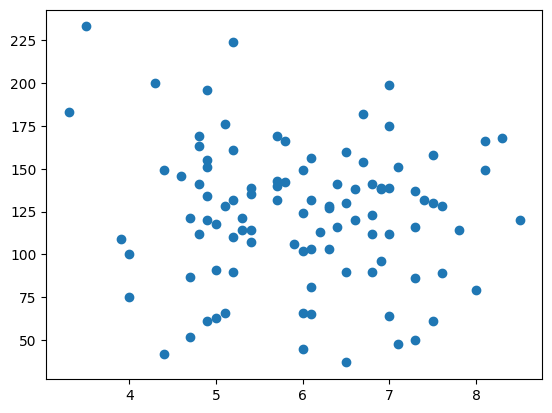

In [4]:
# checking the data points on 2d plane
plt.scatter(data['cgpa'],data['iq'])

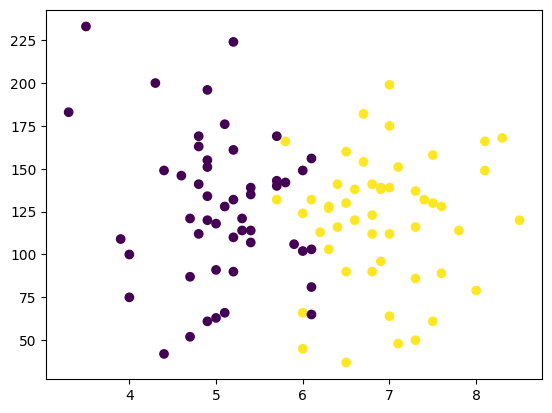

In [5]:
# Now i want to check the placement of students
# Yellow got the placement
plt.scatter(data['cgpa'],data['iq'], c = data['placement'])

## Classification Problem 
As you can see the data is classified into two parts Placement and No Placement.
So we will be using Logistic regression in this project

## 2. Extract input and output values

In [6]:
independent_val = data.iloc[:,0:2]
dependent_val = data.iloc[:,-1]

In [7]:
independent_val

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [8]:
dependent_val

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

## 3. Train Test Split

In [9]:
# this function of model_selection takes 3 params 
# independent , dependent, test_size
# it returns x of train and test, y of train and test
indep_train,indep_test,depen_train,depen_test = train_test_split(independent_val,dependent_val,test_size = 0.1)

In [10]:
indep_train

,cgpa,iq
12,5.4,139.0
81,5.4,107.0
6,5.7,143.0
16,5.2,224.0
40,4.9,134.0
...,...,...
82,6.5,37.0
11,6.9,138.0
30,7.6,128.0
21,7.1,151.0


In [11]:
indep_test

,cgpa,iq
96,4.4,42.0
2,5.3,121.0
28,5.2,90.0
56,6.1,65.0
70,6.3,127.0
3,7.4,132.0
49,5.4,135.0
52,7.0,175.0
67,5.0,118.0
99,6.2,113.0


In [12]:
depen_train

12    0
81    0
6     0
16    0
40    0
     ..
82    1
11    1
30    1
21    1
17    0
Name: placement, Length: 90, dtype: int64

In [13]:
depen_test

96    0
2     0
28    0
56    0
70    1
3     1
49    0
52    1
67    0
99    1
Name: placement, dtype: int64

## 4. Scaling the Data
It is not neccassory but its good to scale the values

In [14]:
# this function will fit the data and then transform it
scaler = StandardScaler()
indep_train = scaler.fit_transform(indep_train)
# now we the pattern we dont need to fit the data anymore
indep_test = scaler.transform(indep_test)

In [15]:
indep_train

array([[-0.52440888,  0.35328982],
       [-0.52440888, -0.44787135],
       [-0.26603224,  0.45343497],
       [-0.69665997,  2.48137416],
       [-0.9550366 ,  0.22810839],
       [ 1.11197649, -0.97363336],
       [ 0.25072103,  0.07789067],
       [ 0.33684658,  0.40336239],
       [ 0.33684658, -0.22254477],
       [ 1.80098085,  1.02926955],
       [-1.04116215,  0.95416069],
       [-1.04116215,  0.40336239],
       [ 1.11197649, -1.87493967],
       [-0.78278551, -1.47435909],
       [ 0.50909767,  0.32825353],
       [ 1.28422758,  0.12796324],
       [ 0.76747431,  0.35328982],
       [-0.78278551,  0.07789067],
       [-1.04116215,  1.10437841],
       [-0.0076556 , -1.47435909],
       [-0.69665997,  0.90408812],
       [-1.47178988,  1.88050329],
       [-0.1799067 ,  0.42839868],
       [ 0.68134876, -0.04729076],
       [ 0.59522321,  0.72883412],
       [ 0.59522321,  1.42985014],
       [ 0.76747431, -0.7232705 ],
       [-0.78278551,  1.27963242],
       [ 0.85359985,

In [16]:
indep_test

array([[-1.38566433, -2.07522996],
       [-0.61053442, -0.09736334],
       [-0.69665997, -0.87348821],
       [ 0.07846994, -1.49939538],
       [ 0.25072103,  0.05285438],
       [ 1.19810203,  0.17803581],
       [-0.52440888,  0.25314467],
       [ 0.85359985,  1.25459613],
       [-0.86891106, -0.1724722 ],
       [ 0.16459549, -0.29765363]])

## 5. Training the Data
using the LogisticRegression Model

In [17]:
L_regression = LogisticRegression()
L_regression.fit(indep_train,depen_train)

LogisticRegression()

## 6. Evaluate the Model

In [18]:
# Predicted result by the model
predictions = L_regression.predict(indep_test)
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [19]:
# Actual result
list(depen_test)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1]

In [20]:
# Now we will calculate the accuracu score
accuracy_score(depen_test,predictions)

0.9

<Axes: >

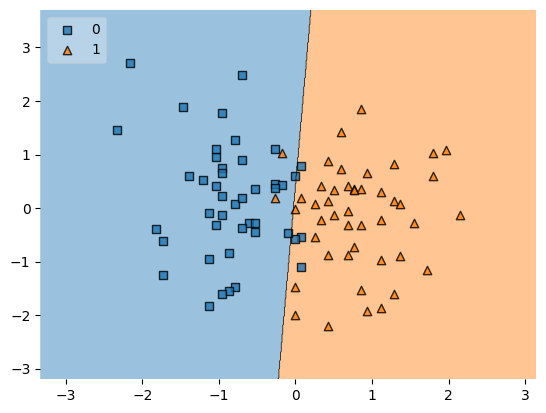

In [21]:
# Now we will see the decision boundary
from mlxtend.plotting import plot_decision_regions
# this function takes x_train, y_train , clf, legend = 2
plot_decision_regions(indep_train,depen_train.values, clf = L_regression, legend = 2)

## Deploying the Model
pickle library is used to convert your object into binary file

In [22]:
import pickle
# this functin will take object(model) and create an binary file in the same folder
pickle.dump(L_regression,open('model-pkl','wb'))